In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import time


In [63]:
apData = pd.read_csv('./Data/ScrappedDataClean.csv')

In [64]:
apData

,Date,Adress,Size,Rooms,Broker,Rent,Price,NearbyPOIs,Latitude,Longitude,PricePerKvm,PricePerRoom
0,20210610.0,Skebokvarnsvägen 366,92.5,4.0,Fastighetsbyrån Farsta/ Högdalen/ Skogås,5953.0,3950000.0,21.0,59.261980,18.040237,42703.0,987500.0
1,20210610.0,Beckomberga Ängsväg 22,91.0,4.0,Svenska Mäklarhuset Bromma,4730.0,5000000.0,20.0,59.356955,17.899475,54945.0,1250000.0
2,2021069.0,Brf Grindavik - Kista Gårdsväg,91.1,4.0,Våningen & Villan Stockholm,4803.0,3995000.0,82.0,59.407398,17.943506,43853.0,998750.0
3,2021069.0,Arbetargatan 23A,92.0,3.0,HusmanHagberg Kungsholmen,4338.0,6650000.0,468.0,59.334550,18.027191,72283.0,2216667.0
4,2021069.0,Kista Alléväg 9,91.1,4.0,Våningen & Villan Stockholm,4803.0,3995000.0,81.0,59.407664,17.944107,43853.0,998750.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,20130215.0,Båtholmsbacken 6,100.0,4.0,Mäklarringen Hägersten/Skärholmen/Älvsjö,4361.0,1760000.0,5.0,59.273208,17.882996,17600.0,440000.0
3908,2013027.0,Petrejusvägen 18,99.0,4.0,Fastighetsbyrån Enskede,5338.0,2925000.0,308.0,59.297758,18.095856,29545.0,731250.0
3909,20130129.0,Svärdlångsvägen 27,99.5,4.0,Notar,5963.0,3400000.0,195.0,59.300563,18.035431,34171.0,850000.0
3910,20130126.0,Stapelgatan 5,99.5,4.0,Fastighetsbyrån Stockholm - Hammarby Sjöstad,5020.0,5550000.0,157.0,59.308975,18.104095,55779.0,1387500.0


In [65]:
print(apData.shape)

(3912, 12)


In [66]:
def plot_corr(apData, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = apData.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


,Date,Size,Rooms,Rent,Price,NearbyPOIs,Latitude,Longitude,PricePerKvm,PricePerRoom
Date,1.000000,-0.002744,0.025201,-0.001272,0.033815,-0.010198,-0.005351,0.014972,0.033296,0.025685
Size,-0.002744,1.000000,0.114187,0.126162,0.005315,-0.030543,0.045373,-0.030315,-0.086372,-0.019714
Rooms,0.025201,0.114187,1.000000,0.110599,-0.144491,-0.147577,0.008300,-0.069756,-0.156190,-0.366482
Rent,-0.001272,0.126162,0.110599,1.000000,-0.345342,-0.274937,0.012161,-0.101018,-0.356935,-0.351578
Price,0.033815,0.005315,-0.144491,-0.345342,1.000000,0.457947,-0.037035,0.395393,0.995308,0.972259
NearbyPOIs,-0.010198,-0.030543,-0.147577,-0.274937,0.457947,1.000000,0.029300,0.336056,0.459913,0.467907
Latitude,-0.005351,0.045373,0.008300,0.012161,-0.037035,0.029300,1.000000,-0.629623,-0.040040,-0.034226
Longitude,0.014972,-0.030315,-0.069756,-0.101018,0.395393,0.336056,-0.629623,1.000000,0.395648,0.386594
PricePerKvm,0.033296,-0.086372,-0.156190,-0.356935,0.995308,0.459913,-0.040040,0.395648,1.000000,0.970520
PricePerRoom,0.025685,-0.019714,-0.366482,-0.351578,0.972259,0.467907,-0.034226,0.386594,0.970520,1.000000


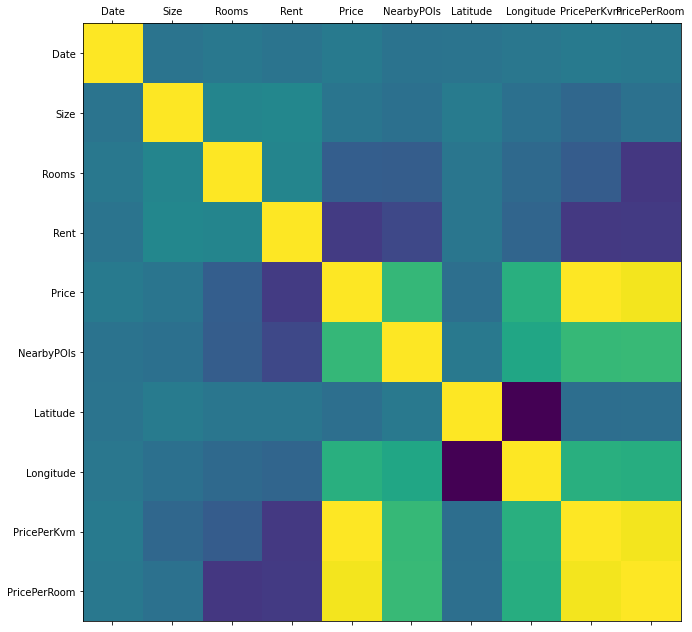

In [67]:
plot_corr(apData)
apData.corr()

<AxesSubplot:xlabel='Price'>

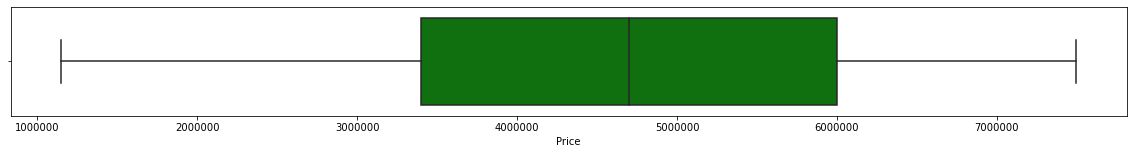

In [68]:
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['Price'], color="green")

<AxesSubplot:xlabel='NearbyPOIs'>

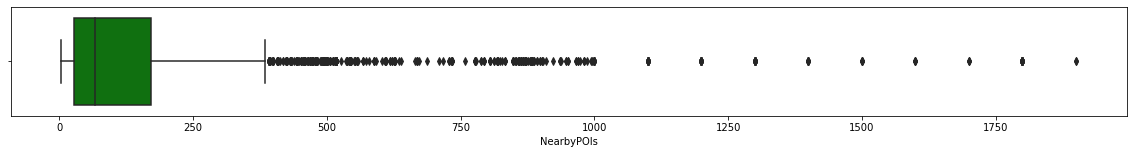

In [69]:
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['NearbyPOIs'], color="green")

<AxesSubplot:xlabel='Rent'>

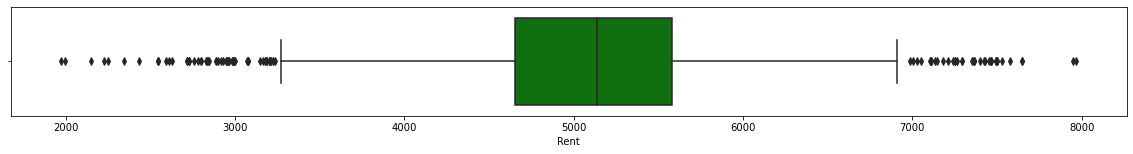

In [70]:
#Rent per Week
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['Rent'], color="green")

<AxesSubplot:xlabel='Latitude'>

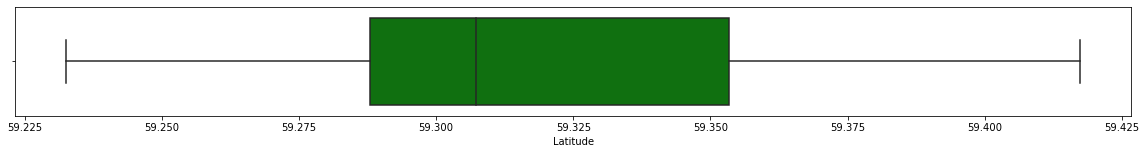

In [71]:
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['Latitude'], color="green")

<AxesSubplot:xlabel='Longitude'>

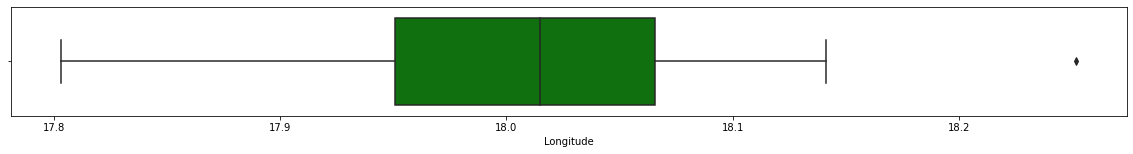

In [72]:
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['Longitude'], color="green")

<AxesSubplot:xlabel='PricePerKvm'>

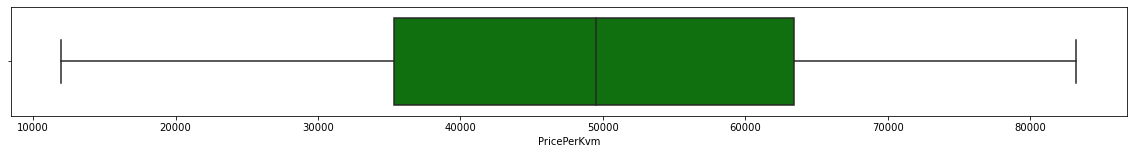

In [73]:
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['PricePerKvm'], color="green")

<AxesSubplot:xlabel='Size'>

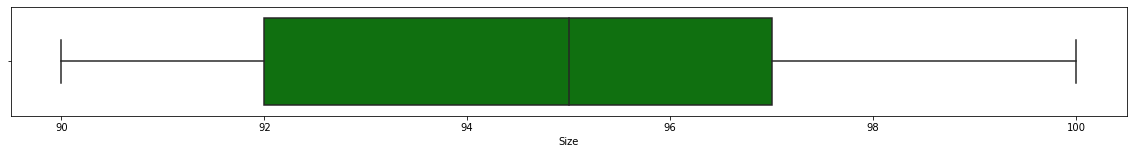

In [74]:
plt.figure(figsize=(20,2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=apData['Size'], color="green")

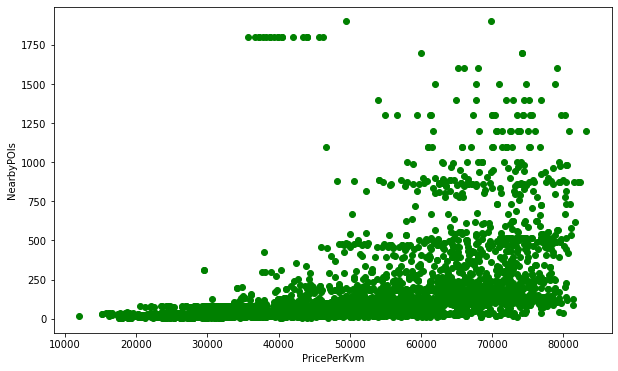

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
plt.ticklabel_format(style='plain')
ax.scatter(x=apData['PricePerKvm'],y=apData['NearbyPOIs'], color="green", alpha=1.0)
ax.set_xlabel('PricePerKvm')
ax.set_ylabel('NearbyPOIs')
plt.show()

C:\Users\bolt.jeremy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


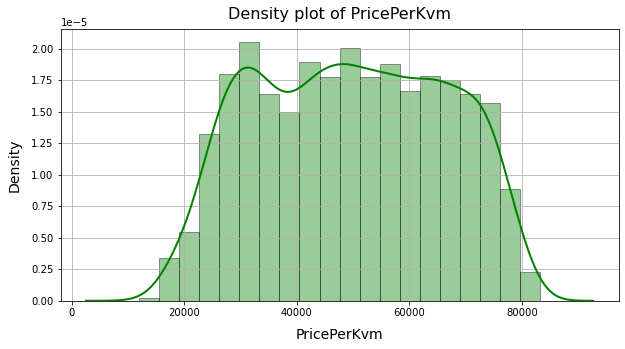

In [76]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.distplot(apData['PricePerKvm'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot of PricePerKvm', fontsize=16, pad=10)
plt.xlabel('PricePerKvm', fontsize=14, labelpad=10)
plt.ylabel('Density', fontsize=14, labelpad=10)
plt.grid(True)
plt.show()

In [77]:
apData.describe()

,Date,Size,Rooms,Rent,Price,NearbyPOIs,Latitude,Longitude,PricePerKvm,PricePerRoom
count,3.912000e+03,3912.000000,3912.000000,3912.000000,3.912000e+03,3912.000000,3912.000000,3912.000000,3912.000000,3.912000e+03
mean,1.512792e+07,94.796472,3.957566,5104.874489,4.701479e+06,167.335890,59.317368,18.008050,49639.237986,1.195766e+06
std,8.133638e+06,2.914669,0.201602,783.666825,1.553765e+06,272.932101,0.041035,0.073127,16467.480900,4.175550e+05
min,2.013027e+06,90.000000,3.000000,1974.000000,1.150000e+06,4.000000,59.232487,17.803345,11979.000000,2.875000e+05
25%,2.020108e+06,92.000000,4.000000,4653.500000,3.398750e+06,28.000000,59.287940,17.950974,35326.750000,8.500000e+05
50%,2.016023e+07,95.000000,4.000000,5138.500000,4.700000e+06,66.000000,59.307223,18.014832,49521.500000,1.180625e+06
75%,2.018111e+07,97.000000,4.000000,5583.000000,6.000000e+06,172.000000,59.353456,18.065815,63407.500000,1.525000e+06
max,2.021061e+07,100.000000,4.000000,7966.000000,7.495000e+06,1900.000000,59.417447,18.251724,83222.000000,2.498333e+06


##Median Price for Stockholm (90-100 KVM): 4.70 million SEK 

##Median Rent for Stockholm (90-100 KVM): 5100 SEK / Per Week

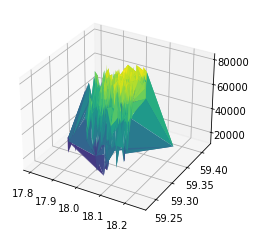

In [78]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(apData['Longitude'], apData['Latitude'], apData['PricePerKvm'],
                    cmap=plt.cm.viridis, linewidth=1)
plt.show()

surf = ax.plot_trisurf(apData['Longitude'], apData['Latitude'], apData['PricePerKvm'],
                           cmap=plt.cm.viridis, linewidth=1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Rotate view
ax.view_init(30, 45)

ax.plot_trisurf(apData['Longitude'], apData['Latitude'], apData['PricePerKvm'],
                cmap=plt.cm.jet, alpha=0.2, linewidth=1, antialiased=True)
plt.show()